# Career Exploration Kaggle Project

## The Data Science Workflow

In general, there are a few key steps to begin working with a dataset.

_First_, we need to understand what the dataset actually is about, and what we are trying to 
do with it. The key to this stage is understanding what each row of the dataset represents, as 
well as what each column indicates. You can read more about this dataset by looking at the 
dataset itself (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/), but we highly suggest 
reading the __data dictionary__ in [data-dictionary](DATA/data_description.txt). Note that the dataset is formatted so that each house has it's own row and each feature has it's own column.

_Second_, before we can even do exploratory data analysis, we need to __clean our dataset__. It is very helpful to identify the size of the dataset, so we know how many samples we have. We also need to determine a consistent method of dealing with missing values, such as setting them to a value, removing features (columns) entirely, or removing individual rows that contain missing values. Other crucial steps are separating into training and validation, as well as creating elementary data plots.

_Third_, we have __exploratory data analysis (EDA)__. The point of this phase is to inspect & visualize key relationships, trends, outliers, and issues with our data. For today's lesson, this is centered around data visualization for interpreting which features we deem most important in determining sale price. 

_Fourth_, we have the modeling phase, consisting of __model selection__ and __model training__. Here, we select a predictive model to train on our features, and then actually train the model! For this week, we will be using __linear regression__. Depending on the model we are using, it is important to verify the model's assumptions before fully pledging to that model.

_Finally_, we have the __model evaluation__ phase. Here, we compute a metric for our model's performance, usually by summing the squared errors of the model's predictions on the test set. This stage allows us to effectively compare various data cleaning and modeling selection decisions, by giving us a single comparable value for performance across our potential models.

### I. Understanding our Dataset

<img src="IMAGES/housing.jpg">

Our dataset is about houses in Iowa! According to the Kaggle webpage, the competition is 
as follows:

_"Ask a home buyer to describe their dream house, and they probably won’t begin with the 
height of the basement ceiling or the proximity to an east-west railroad. But this 
playground competition’s dataset proves that much more influences price negotiations than 
the number of bedrooms or a white-picket fence. With 79 explanatory variables describing 
(almost) every aspect of residential homes in Ames, Iowa, this competition challenges you 
to predict the final price of each home."_

More explicitly, our dataset has __81 columns__, or features:

1. __SalePrice__, our response variable $Y$ that we are trying to predict accurately and 
precisely
2. __Id__, a simple identification variable that numbers each individual house in our dataset.
3. 79 additional variables $X_k$ that we can use to predict SalePrice. Some of the variables are _categorical_, and others are _quantitative_.

The goal for this project is to create a model that trains on (some of) the 79 explanators from the training set to predict SalePrice well in the test set. We will help get you started in culling down these features to a few which are most important.

How will we know which explanators to use? We can start with some intuition and research 
into what each column represents by reading the data dictionary in  [data-dictionary](DATA/data_description.txt).

Please take a moment to read over this dictionary, as you will need to have a keen sense 
of these features for today's lesson.

Now that we've talked a bit about this dataset, let's actually take a look at it. The 
first step is to load in the data! We will store this in a pandas dataframe.

In [2]:
import pandas as pd
train = pd.read_csv('DATA/train.csv')
test = pd.read_csv('DATA/test.csv')

#Let's see what the training dataframe looks like!
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


We have a training dataset and a testing dataset. You will learn more about how these datasets work together in the linear modelling portion of today's lecture. For now, just focus on the training set.

### Questions to Consider:

> How many features (columns) do we have? How many entries (rows)?
> What does a single row represent in our dataset?
> List 3 issues/questions that you see from the dataset. 
Some ideas to get started:
* What does LotShape represent?
* Is it a good thing that we have so many features? How many features are too many features?
* How does a large number of features affect our modeling approach?
> What are some important things we should do for data cleaning and exploration? Some ideas to get started: are all the values in LotFrontage numeric? What about Alley? How should we fix missing/NA values that appear sporadically in some columns? What about columns that are almost entirely full of NA values? Some columns are qualitative strings, whereas others are qualitative numerics - how might this affect our cleaning?

## Data Cleaning

In [3]:
print("size",train.shape)
print("Test size",test.shape)

size (1460, 81)
Test size (1459, 80)


This tells us that we have  1460  datapoints in the training set, and we would like to predict on  1459  samples. There are  80  total features, and one response variable we would like to predict. However, not all these 'features' are actually useful, such as Id. Thus we need to understand what the actual variables mean. A huge part in data science is actually understanding the variables. Of course it is possible to throw the data into some machine learning model and have it spit out predictions, but without actually understanding what data you are dealing with and how to feed the data into the model, your model is worthless.

Spend a good deal of time reading over the data dictionary.

### Questions for Understanding:

> There are many categorical variables. 

What are some possibilities to deal with these variables? 
How do we determine which features actually influence house price?
How do we ensure these features are used in our model?

> Are there any categorical variables that we can convert to numerical/quantitative variables as well?

> Are there any variables that are just irrelevant and we can ignore?

One helpful method is looking at the unique values of a feature.

In [4]:
#We can view the unique values of a given feature
train['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

As we see above, the feature 'Foundation' is a categorical variable that has qualitative values for different types of Foundation. It also has no 'NA' values. 

## Dealing with NA Values

In almost all datasets, we will have NA values. These can be a pain to deal with, as there are many viable choices of what to do. First, it is good to see what columns have NA values.

We will do this by summing up the number of 'NA' values for each unique feature.

In [5]:
from operator import itemgetter
sorted(list(filter(lambda x: (x[1]!=0),\
           [(train.isnull().sum().index[i],train.isnull().sum().values[i]) \
           for i in range(len(train.isnull().sum()))])), key=itemgetter(1), reverse= True)

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

It seems that many of the features have a great deal of NAs. However, this is not necessarily the case. The astute reader will notice that some variables like Alley, PoolQC, and Fence, have NA has an actual value. You can look at the dictionary to see this for yourself. 

The code directly above lists the number of NAs in descending order for each feature. However we need to refer to the output preceding this to know which features have these NA values.

For example, consider Pool Quality:

In [6]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

So 'NA' values can actually provide information about a feature and do not necessarily mean that there is missing ingotmation. In this case, what does an 'NA' value mean for PoolQC? We need to parse through the data dictionary to see when NA's are actually significant, and when they mean NA.

The features that we found with 'NA' values (that actually have meaning) are: 

Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, Misc Feature.

* Alley: NA for no alley access
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: NA for no basement
* FireplaceQu: NA for no fireplace
* GarageType, GarageFinish, GarageQual, GarageCond: NA for no garage
* PoolQC: NA for no pool
* Fence: NA for no fence
* Misc Feature: NA for no other miscellanous features (i.e. elevator, 2nd garage, shed, tennis Court, other)

The other categories containing many NA values may not be useful to us. 

Also, multiple features can give us the same information, for example garage year built and house year built probably don't give us much new info, we can check this through a correlation matrix.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

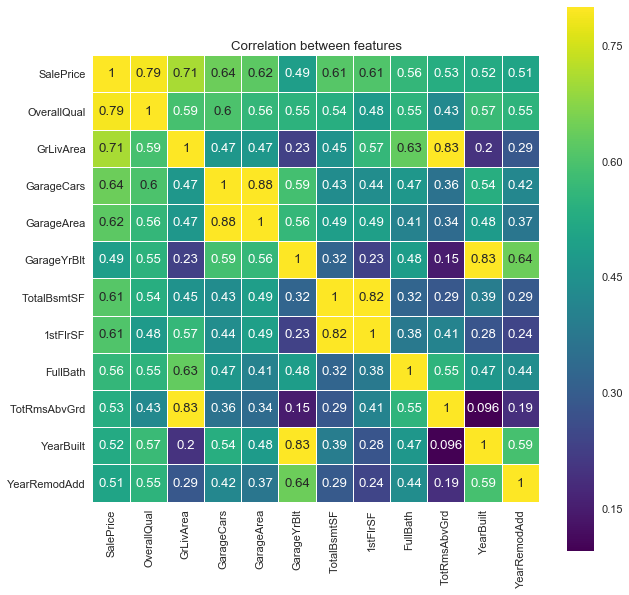

In [17]:
corrMatrix=train[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

## Data Cleaning Functions

We provide some functions to help with data cleaning and preprocessing. One is used to create one hot encodings of various features, and the latter is for converting a categorical feature into values.

### Dropping Columns

Often, you’ll find that not all the categories of data in a dataset are useful to you. For example, you might find, during this project, that Garage Condition, Basement Condition, and Garage Year Built simply do not influence house price. (You need to see for yourself if this is actually true).

If these two categories are not influencing house price, they are effectively not important to you. Therefore, retaining these variables will take up unnecessary space and could even slow down runtime (which would hurt your chance at winning the Kaggle competition).

We can drop these columns from the training set in the following way:

In [18]:
to_drop = ['GarageCond', 'BsmtCond', 'GarageYrBlt']
train.drop(to_drop, inplace=True, axis=1) #The axis=1 parameter is telling us to delete the columns and not rows.
test.drop(to_drop, inplace=True, axis=1)
#Let's check to see that the columns are gone:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


We also want to drop the following columns because they contain NA values which are not an actual feature option. That is, the NA values mean that there is no actual data on the given feature for a specific home. An alternative route would be to remove the rows which contain NA values for these features, but that would actually shrink our dataset significantly. Since we clearly have an abundance of features, it's okay to remove some of them:

In [19]:
to_drop = ['Electrical','LotFrontage', 'MasVnrType', 'MasVnrArea']
train.drop(to_drop, inplace=True, axis=1)
test.drop(to_drop, inplace=True, axis=1)
train.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Using `.loc[ ]`

`dataframe.loc[]` is a location-based indexer that we can use to hone in on a specific row or column value. Suppose we just want to hone in on one particular house sale -- let's say the 1457th house in our list. The 1457th house would be indexed at 1456, since we index starting with 0 in python.

In [20]:
train.loc[1456][:5]

Id             1457
MSSubClass       20
MSZoning         RL
LotArea       13175
Street         Pave
Name: 1456, dtype: object

Suppose we want to observe all categorical values from the 1457th house to the last (1460th) house. We write:

In [21]:
train.loc[1456:]

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


And suppose we don't want to parse through everything we printed just to find what the value of a certain category was for the 1457th house. We can write the following to find out what month the 1457th house was sold in.

In [22]:
train.loc[1456, 'MoSold']

2

The house was sold in February. Also if we look above, we can say that the house has 'NA' values for Alley, LotShape, PoolQC, and MiscFeature.

I introduced the function `loc[]` to help you in deciding which columns to remove. Since our dataset is so large it may be easier to look at rows one by one in some cases. How you use or do not use `loc[]` is up to you!

### Renaming Columns and Skipping Rows

Often, the datasets we work with label their columns in inconvenient ways. For example, maybe the column name is too vague or too long. Or maybe the dataframe will not be _rectangular_, meaning there could be unimportant information in the first few rows.

In that case, we’d want to rename columns and skip certain rows so that we can drill down to necessary information with correct and sensible labels. For example, the following screenshot from MS Excel shows a non-rectangular dataset.

<img src="IMAGES/missing.png">

In our case, our data is rectangular, but sometimes datasets can be a lot messier to begin with. So we will just focus on renaming columns. 

To rename the columns, we will make use of a DataFrame’s rename() method, which allows you to relabel an axis based on a mapping.

Suppose that we want the 'Quality' variables to have consistent names and want to change the following to match up with the format of 'OverallQual'.  
* Change 'HeatingQC' to 'HeatingQual'
* Change 'FireplaceQu'to 'FireplaceQual'
* Change 'PoolQC' to 'PoolQual'

And suppose we want to shorten a couple names:

* Change 'Neighborhood' to 'Nbhd'
* 'EnclosedPorch' to 'EnclsdPorch'

Since we are only changing a handful of the columns, we do not want to relist all the columns that are not being renamed. We can use the rename function to tweak only the columns we want:

In [23]:
train.rename(index=str, columns={"HeatingQC": "HeatingQual", 
                                 "FireplaceQu": "FireplaceQual",
                                "PoolQC": "PoolQual",
                                "Neighborhood" : "Nbhd",
                                "EnclosedPorch" : "EnclsdPorch"}, inplace=True)
test.rename(index=str, columns={"HeatingQC": "HeatingQual", 
                                 "FireplaceQu": "FireplaceQual",
                                "PoolQC": "PoolQual",
                                "Neighborhood" : "Nbhd",
                                "EnclosedPorch" : "EnclsdPorch"}, inplace=True)

In [24]:
#Let's check that the columns were renamed:
list(train.columns.values)[:5]

['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street']

It worked!

If you don't like the changes made, you can revert the changes by using rename again. You can also make new changes to the column names that make more sense to you.

Use this format to change any column names as you see fit. You'll have to un-comment (remove the pound sign from) the code below if you want to use it.

In [25]:
#train.rename(index=str, columns={"": "", "": ""}, inplace=True)
#manipulate train and test the same way
#test.rename(index=str, columns={"": "", "": ""}, inplace=True) 

## One Hot Encoding for Unordered Categorical Variables

### Ordered Categorical Variables

Suppose we have a feature 'Attendance' for a data frame of SUSA members. Let's say there are  3  possible values, Good, Ok, Poor. These inherently have an ordering, Good is better than Okay which is better than Poor. We can assign a numerical value to these, such as  0  for Poor,  1  for Ok, and  2  for Good. This function is named LabelEncoder and is explained below.


### One Hot Encoder

Suppose we have a feature 'Committee' for a data frame of SUSA members. Let's denote the committees by CX, DC, RP, EC, IVP, EVP, and WD. There is no inherent ordering to the features, but each member is only in one committee. Thus we can replace this categorical variable with a single boolean for committee. If a member is a part of CX, then they will have a  1  for CX and  0  for all other variables. This function is named OneHotEncoder and is indicated below.

Please read over the following code carefully. This is how to use Label Encoding and One Hot Encoding together to recategorize a variable. 

In particular, we see from the dictionary that Exterior Quality can take on 5 different values. Upon closer look, it appears that no single house was marked as having 'Poor' quality so we can ignore that option:

#Add Visualization of one hot encoding, maybe something like https://www.google.com/search?q=one+hot+encoding+example&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiruuKf3YfeAhVCFzQIHdUICEQQ_AUIDigB&biw=1171&bih=576#imgrc=lyAsLJtlYs1DpM:

In [26]:
train['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

Now we use OneHotEncoder and LabelEncoder as follows to create 4 columns, each one designating the the quality of the variable. So in this case, we will have a new column for every house that has 'Gd' ExteriorQual, another for 'TA' ExteriorQual, etc. Python naturally orders the different values alphabetically. Hence, the first column will correspond to 'Excellent', then 'Fair', etc.

In addition, when LabelEncoder works throught the variable chosen, it will naturally associate the following numeric values since it begins at 0 and labels alphabetically:
* Ex is 0
* Fa is 1
* Gd is 2
* TA is 3

To start, let's show how python will naturally associate numeric values with strings.

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#here we are importing the necessary functions from sklearn

#We let the function LabelEncoder associate a value, 0, 1, 2, or 3, 
#with each distinct value that ExterQual takes on. We also create
#a new column that gives the numeric value associated with the 
#value that ExterQual took on for each row and concatenate it with
#the current data set.

enc_label = LabelEncoder()
enc_onehot = OneHotEncoder(sparse=False)
labeled = enc_label.fit_transform(train.ExterQual)
one_hot = enc_onehot.fit_transform(labeled.reshape(-1, 1))


#print(train.ExterQual) 
#the above line tells us the results for ExterQual for each row
print(one_hot)
#the above line shows how the one hot encoding works to separate ExterQual into several columns.

#this actually implements our code above by switching our qualitative categorical variable for a quantitative one.
train['ExterQual'] = enc_label.fit_transform(train.ExterQual)

#Now let's print what we have to see that our column indicates
#ExterQual numerically:
train.loc[:, 'ExterQual':'ExterQual'][:5]

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


,ExterQual
0,2
1,3
2,2
3,3
4,2


As shown in the table above, we indexed each attribute of the category for Exterior Quality using LabelEncoder. We effectively made a categorical variable into a quantitative one.

Now let's complete what we had set out to do -- making individual columns for each possible value of 'ExterQual':

In [29]:
#First let's repeat what was done above.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

train_one_hot = pd.read_csv('DATA/train.csv')

#Since we do not desire to add another quantitative column as we did
#above, I labeled our transformed vector 'alpha' and did not attach
#it to our dataset.
enc = LabelEncoder()
alpha = enc.fit_transform(train.ExterQual)
#Now we continue from above to make different columns for each possible
#attribute of the category 'ExterQual'.

#We let the function OneHotEncoder reshape the data because it was
#made into an array separated by value of ExterQual. We are making 
#a column that returns 1 if the feature from the column ExterQual is
#found to be associated with that row.
ohe = OneHotEncoder()
X = ohe.fit_transform(alpha.reshape(-1,1)).toarray()

#Now we label the new columns in a way that is understandable to the viewer
#and we concatenate the columns we created above with our dataset.
trainOneHot = pd.DataFrame(X, columns = ['Excellent ExterQual', 
                                         'Fair ExterQual', 
                                         'Good ExterQual', 
                                         'Average/Typical ExterQual'])

train_one_hot= pd.concat([train_one_hot, trainOneHot], axis=1)
#We have added 4 columns to the end which indicate ExterQual quantitatively.

unimportantFeatures = ['ExterQual']
for feat in unimportantFeatures:
    train_one_hot = train_one_hot.drop(feat, axis=1)
#above we dropped the qualitative categorical ExterQual column that we originally had.

#Now we see how this looks! 
train_one_hot.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Excellent ExterQual,Fair ExterQual,Good ExterQual,Average/Typical ExterQual
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,0.0,0.0,1.0,0.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,700,10,2009,WD,Normal,143000,0.0,0.0,0.0,1.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,307000,0.0,0.0,1.0,0.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,350,11,2009,WD,Normal,200000,0.0,0.0,0.0,1.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2008,WD,Abnorml,129900,0.0,0.0,0.0,1.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,1,2008,WD,Normal,118000,0.0,0.0,0.0,1.0


Your Turn:
Pick a feature with qualitative elements (and no NA values) and OneHot encode it like we did above. (For example, don't choose BasementQual because it contains NA values and OneHotEncoder does not know how to deal with these.)

In [30]:
#YOUR CODE HERE

As we can see above, OneHotEncoder works to replace one column with several columns. Each new column represents whether or not a given row will have that specific attribute of the variable associated with it. We went further than LabelEncoder because we not only made our variable quantitative, but we separated it into several variables.

Use the above two functions to clean the dataset! Drop columns and also make qualitative features quantitative when needed. We will use data visualization to help you decide which variables to remove and which to OneHot encode. Consider how to deal with NA values, and keep all these commands together. 

Some recommendations:

* Remove features that do not seem important.
* Convert all features into quantitative values when possible
* While cleaning, keep in mind some features that you feel are very helpful.
* Try to narrow down to 8 different features for this model.

In [31]:
# DATA CLEANING
# To start off data cleaning
clean = train.copy()

# You will be selecting your important features explicitly later. 
# But is there anything you want to get rid of explicitly now?
# Use the following code on any factors you would like to remove. 
# For example, 'Id' is just indexing the number of the house. Clearly this does not influence house price. 

unimportantFeatures = ['Id']
for feat in unimportantFeatures:
    clean = clean.drop(feat, axis=1)

#Your Turn: Remove the features you want to neglect below:    

In [32]:
na_features = ['Alley', 'BsmtQual', 'FireplaceQual', 'GarageType', 'PoolQual', 'Fence', 'MiscFeature']
#Remember that we renamed 'PoolQC' and 'FireplaceQu'
filled = clean[na_features].fillna("NOT")
features = [column for column in clean.columns if column not in na_features]
rest = clean[features]
newclean = pd.concat([filled, rest], axis=1)
newclean = newclean.dropna()

In [33]:
newclean.head()

,Alley,BsmtQual,FireplaceQual,GarageType,PoolQual,Fence,MiscFeature,MSSubClass,MSZoning,LotArea,...,EnclsdPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NOT,Gd,NOT,Attchd,NOT,NOT,NOT,60,RL,8450,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,NOT,Gd,TA,Attchd,NOT,NOT,NOT,20,RL,9600,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,NOT,Gd,TA,Attchd,NOT,NOT,NOT,60,RL,11250,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,NOT,TA,Gd,Detchd,NOT,NOT,NOT,70,RL,9550,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,NOT,Gd,TA,Attchd,NOT,NOT,NOT,60,RL,14260,...,0,0,0,0,0,12,2008,WD,Normal,250000


To save the dataframe as csv, run this line of code.

In [34]:
# Save to csv (run this once you've removed the columns you don't want)
newclean = pd.concat([filled, rest], axis=1)
newclean = newclean.dropna()
newclean.to_csv('DATA/train_cleaned.csv')
newclean.to_csv('DATA/test_cleaned.csv')

Now let's move on toward Data Visualization & Linear Modelling.

## Data Visualization

>“Visualization provides insight that cannot be appreciated by any other approach to learning from data.” - <cite>William S. Cleveland</cite>

Analyzing data by just looking at the numbers, even when they’re cleaned, is far too limiting.
No way to tell how columns are related or if any trends exist.



### Patrick's Search

For example, if committee director Patrick Chao was looking for someone special, he would probably collect data on himself and hand out sheets of his data to other people.

In [35]:
patrick = pd.read_csv('DATA/patrick.csv')
patrick

,Age,Height,Funny,Smart,Buff,Personality,GPA
0,20,"5' 8""",5,9,1,8,10


In [36]:
<img src="IMAGES/patrick.JPG">

SyntaxError: invalid syntax (<ipython-input-36-67df7e43b9d8>, line 1)

### The big goal of Visualization: To see overall patterns and detailed behavior.

## Matplotlib

### Introduction

Matplotlib is one of the most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and create publication-quality figures in many formats. The goal of this section is to understand how to use Matplotlib to visualize the attributes from the cleaned training table and discover what attributes correlate most with Sale Price.

In [37]:
# Import matplotlib
import matplotlib.pyplot as plt

<img src="IMAGES/matplotlib.JPG">

### 1st Steps: Plotting

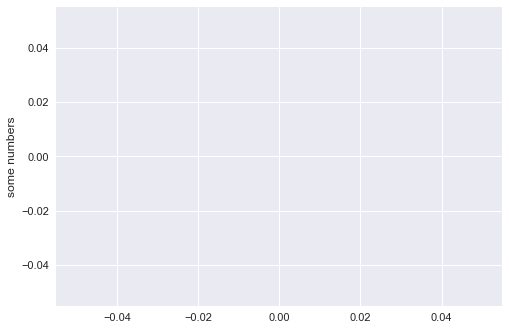

In [38]:
# 1st Step
plt.plot()
# Style Steps
plt.ylabel('some numbers')
# Final Step
plt.show()

### Types of inputs to plotting functions
All matplotlib plots take numpy arrays as input. In fact, all sequences are converted to numpy arrays internally. Classes that are 'array-like' such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting. 

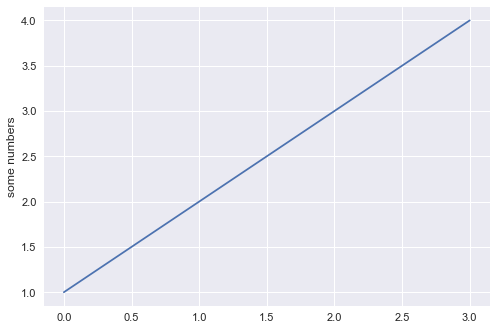

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

`plot()` is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can use the following:

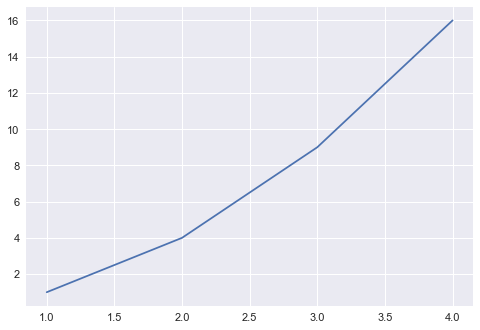

In [45]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

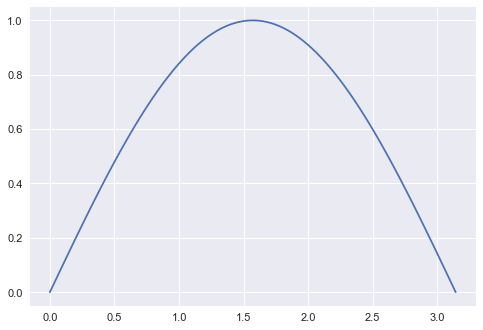

In [46]:
# array of evenly spaces points from 0 to pi
x = np.linspace(0,np.pi,100)
# calculate the sine of each of those points
y = np.sin(x)
# create a plot of the sine curve
plt.plot(x,y)
plt.show()

### Formatting the style of your plot
For every x, y pair of arguments, there is an optional third argument which is used to indicate the color and line type of the plot. You can concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with yellow circles, you would issue

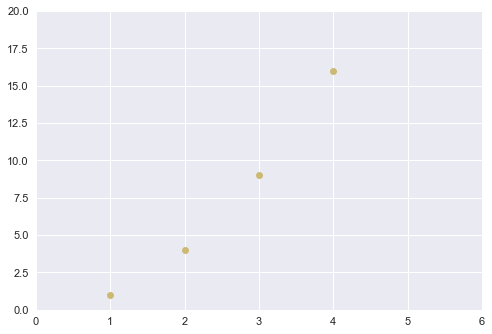

In [47]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'yo')
plt.axis([0, 6, 0, 20])
plt.show()

For more info on other styles, you can visit:
    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

### Matplotlib.pyplot can do many types of visualizations including:
* Histograms, bar charts (using hist)
* Box plots (using boxplot)
* Scatterplots (using scatter)
* Line plots (using plot)
* Pie charts (using pie, polar)
* Etc.

#### Bar Graph

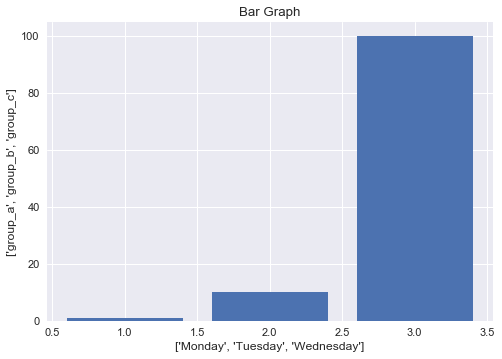

In [54]:
names = ['group_a', 'group_b', 'group_c']
DayOfWeekOfCall = [1,2,3]
LABELS = ["Monday", "Tuesday", "Wednesday"]
values = [1, 10, 100]
plt.bar(DayOfWeekOfCall, values)
plt.title('Bar Graph')
plt.xlabel(["Monday", "Tuesday", "Wednesday"])
plt.ylabel(["group_a", "group_b", "group_c"])
plt.show()

#### Your turn
Make a bar graph of MSZoning from the train table. Make sure to add a x-label, a y-label, and a title to your graph.

The data for MSZoning is specified as such: 
**10** counts of Commercial(C), **10** counts of Floating Village Residential(FV), **16** counts of Residential High Density(H), **1151** counts of Residential Low Density(RL), **218** counts of Residential Medium Density(RM)


In [55]:
# First, import the cleaned dataset.
train_cleaned = pd.read_csv('DATA/train_cleaned.csv')

In [56]:
# Make the bar graph here.
names = ['C', 'FV', 'RH', 'RL', 'RM']
counts = [10, 65, 16, 1151, 218]

# If you're curious, the names and counts were generated with the code below:
# from scipy.stats import itemfreq
# x = train_cleaned["MSZoning"]
# itemfreq(x)

In [57]:
# Extra: Make a horizontal bar graph of the above data. Use plt.barh for horizontal bar graphs.

#### Histogram

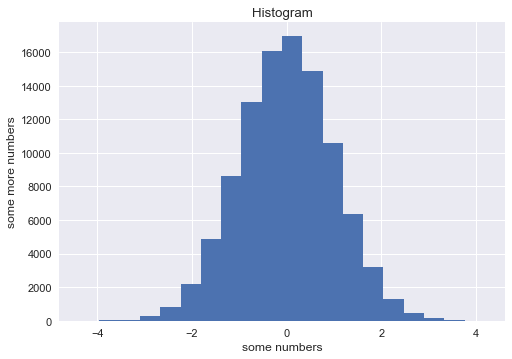

In [58]:
N_points = 100000
n_bins = 20

x = np.random.randn(N_points)
plt.hist(x, bins = n_bins)
plt.title('Histogram')
plt.xlabel('some numbers')
plt.ylabel('some more numbers')
plt.show()

#### Your turn
Make a histogram of LotFrontage from the train table.

In [59]:
# Go for it here.
# Hint: You can find LotFrontage data with train_cleaned['MSSubClass']. Remember, we are using the cleaned data here.

#### Boxplot

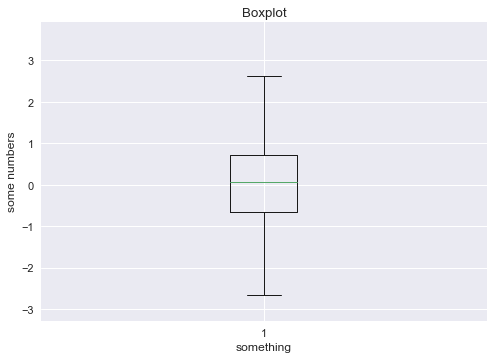

In [60]:
N_points = 1000

x = np.random.randn(N_points)
plt.boxplot(x)
plt.title('Boxplot')
plt.xlabel('something')
plt.ylabel('some numbers')
plt.show()

#### Scatterplot

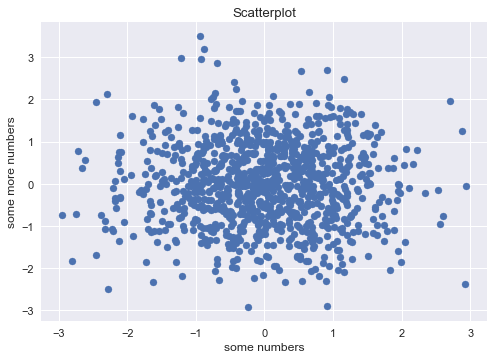

In [61]:
N_points = 1000
x = np.random.randn(N_points)
y = np.random.randn(N_points)
plt.scatter(x,y)

plt.title('Scatterplot')
plt.xlabel('some numbers')
plt.ylabel('some more numbers')
plt.show()

#### Your turn
Make a scatterplot of MoSold versus SalePrice from the train table.

In [62]:
# Go for it here.

#### Line Plot

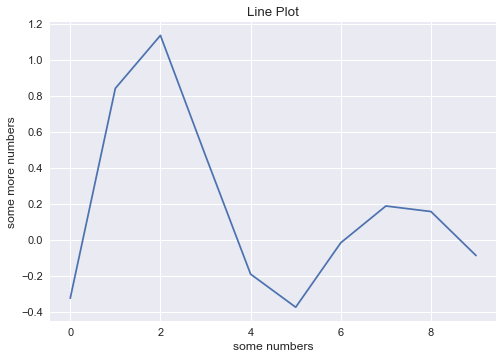

In [63]:
N_points = 10
x = np.random.randn(N_points)
plt.plot(x)

plt.title('Line Plot')
plt.xlabel('some numbers')
plt.ylabel('some more numbers')
plt.show()

### Pie Chart

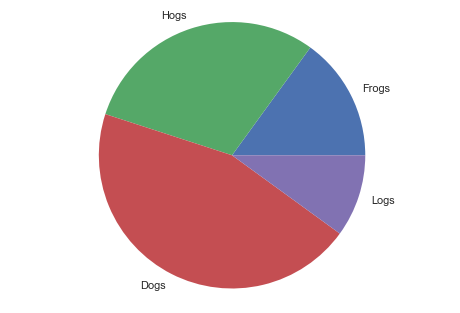

In [64]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
plt.pie(sizes, labels=labels)
plt.axis('equal')
plt.show()

### Figure
The **figure** keeps track of all the plots (ex. barplot, histogram, etc.). Think of it like a blank piece of paper. When graphing one single plot, you do not need to specify a figure in order to graph the plot.

In [65]:
plt.figure()  # an empty figure 

You can increase the size of the figure simply by adding a second argument, figsize, to the figure() function. This can be useful to zoom out in larger graphs or contain multiple plots on the same figure. The standard figsize is (6,4). 

In [66]:
plt.figure(1, figsize=(6,4))

### Subplots
Either a 3-digit integer or three separate integers describing the position of the subplot. The three integers are nrows, ncols, and index in that order.

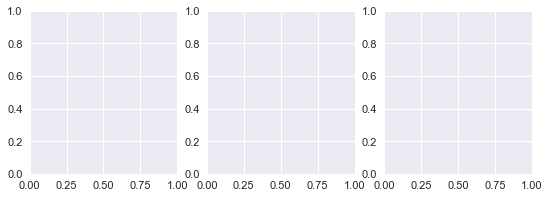

In [67]:
plt.figure(1, figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.subplot(1, 3, 2)
plt.subplot(1, 3, 3)
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

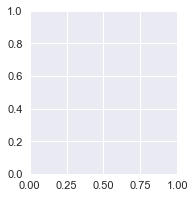

In [68]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

#### Ticks
Change or name ticks on the axis.

TypeError: unsupported operand type(s) for -: 'str' and 'float'

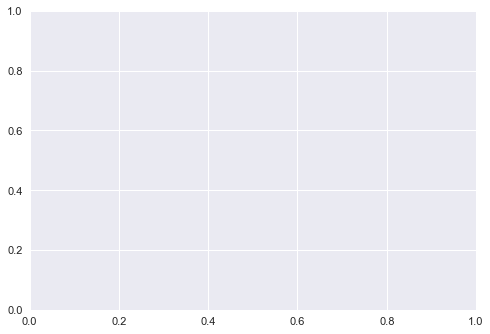

In [69]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 50]
plt.bar(names, values)
plt.title('Bar Graph')
plt.xlabel('some groups')
plt.ylabel('some numbers')

plt.yticks(np.arange(0, 51, 10), ['little', 'small', 'normal', 'big', 'huge', 'collosal'])
#plt.xticks(['a', 'b', 'c'])
plt.show()

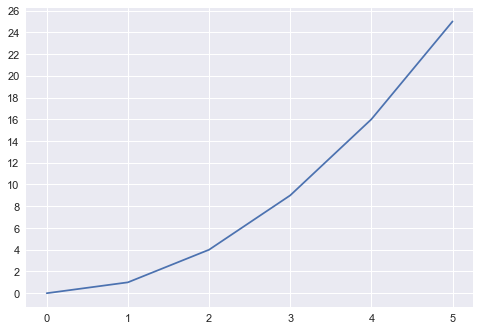

In [70]:
#Example with both yticks and xticks.
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])
plt.yticks(np.arange(0, 28, 2))
plt.xticks(np.arange(0, 6, 1))
plt.show()

### Exercise 1

Plot a bargraph between the Neighborhood(Nbhd) column with SalePrice.

In [151]:
# Use this figure size
# plt.figure(figsize=(10,10))

# Using rotation to rotate the ticks a certain degree. Feel free to play with the angle.
# plt.xticks(rotation=45) 

# Make sure to add a title, x-labels, and y-labels.

### Exercise 2

Plot the correlation between every attribute and SalePrice using a bar graph.

In [152]:
# Setup code. Optional to read. This is how we determined the correlation numbers and label sorting.
num_feat=train_cleaned.columns[train_cleaned.dtypes!=object] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(train_cleaned[col].values, train_cleaned.SalePrice.values)[0,1])    

values_labels = sorted(zip(values,labels))

In [155]:
# Go for it here. Make sure to increase the fig size so the labels are easier to read.

# These are the labels
sorted_labels = [x for y,x in values_labels]
# These are the values
sorted_values = [y for y,x in values_labels]

### Results
If Exercise 2 is completed correctly, the picture below should be the **bottom half** of the plot. If your plot matches this, congratulations! You've discovered the attributes with the highest correlations with Sale Price. Keep these attributes in mind for later when you proceed to the Modelling section.

<img src="IMAGES/exercise2.JPG">

### Seaborn
This is an extra section for **Data Visualization**. So far, all the examples have been done with matplotlib. It's a great package to start plotting with, but if you're curious, Seaborn is an example of another kind of graphing language. It's built up on matplotlib, and if you're interested you can read up on some examples below.

In [116]:
#Importing seaborn
import seaborn as sns

/srv/app/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


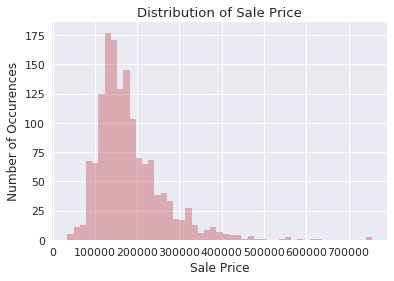

In [117]:
sns.distplot(train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")
plt.show()

/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


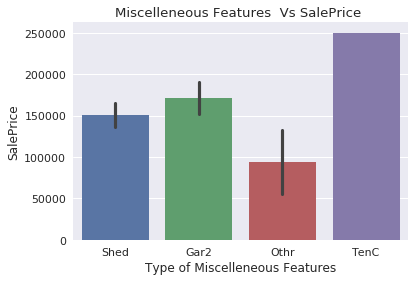

In [118]:
sns.barplot(train["MiscFeature"],train["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features")
plt.show()

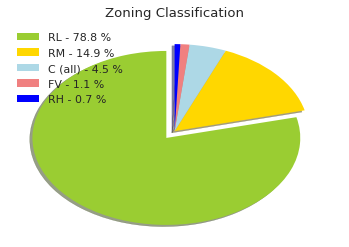

In [119]:
labels = train["MSZoning"].unique()
sizes = train["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

Please visit the seaborn documentation page if you want to learn more:
https://seaborn.pydata.org/

Next, we'll go over modelling with the data.

# Preprocessing

One may notice that the Sales Prices have an extremely wide range of values. One way to make these easier to deal with is to log transform the sales prices.

In [82]:
train_cleaned = pd.read_csv('DATA/train_cleaned.csv')
one_hot = pd.get_dummies(train_cleaned)
preprocessing_test = pd.get_dummies(train_cleaned)

In [83]:
preprocessing_test['LogSalePrice'] = np.log(preprocessing_test['SalePrice'])

## Scaling

`StandardScaler` - subtract the mean and divide by std <br>
`MaxAbsScaler` - transform the absolute values of all the absolute value to [0, 1] bounds <br>
Check out http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html to see the differences and advantages/disadvantages of each scaler. 

Below we choose to clean up Lot Area in two different ways.

In [84]:
import sklearn.preprocessing as pp
ss = pp.StandardScaler()
mas = pp.MaxAbsScaler()

In [85]:
preprocessing_test['LotArea_norm'] = ss.fit_transform(preprocessing_test[['LotArea']])
preprocessing_test['LotArea_mas'] = mas.fit_transform(preprocessing_test[['LotArea']])

# One hot encoding

Hopefully you understood how OneHotEncoding works above. We now introduce another way to perform OneHotEncoding that requires fewer lines of code. We will implement it on the Features 'LotShape' and 'LandContour'. 

In [74]:
small_clean = clean[["LotShape", "LandContour"]]
small_clean.head()

,LotShape,LandContour
0,Reg,Lvl
1,Reg,Lvl
2,IR1,Lvl
3,IR1,Lvl
4,IR1,Lvl


Pandas offers an easier way to convert a pandas dataframe into an one hot encoded one

In [75]:
small_clean_one_hot = pd.get_dummies(small_clean)
small_clean_one_hot.head()

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1


We see that get_dummies worked to create new columns for each categorical option of the features 'LotShape' and 'LandContour'. Now let's review which features have NA values (that remain on our dataframe) and perform get_dummies on these features.

# Model Creation Day 1- LinearRegression

Let's start by creating a simple Linear Model

In [89]:
one_hot.head()

,Unnamed: 0,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,60,8450,7,5,2003,2003,2,706,0,...,0,0,0,1,0,0,0,0,1,0
1,1,20,9600,6,8,1976,1976,3,978,0,...,0,0,0,1,0,0,0,0,1,0
2,2,60,11250,7,5,2001,2002,2,486,0,...,0,0,0,1,0,0,0,0,1,0
3,3,70,9550,7,5,1915,1970,3,216,0,...,0,0,0,1,1,0,0,0,0,0
4,4,60,14260,8,5,2000,2000,2,655,0,...,0,0,0,1,0,0,0,0,1,0


In [91]:
feature_cols = ['LotArea',  'OverallCond', 'BsmtFinSF1']
y_name = 'SalePrice'
feature_matrix = one_hot[feature_cols + [y_name]].dropna().values
X = feature_matrix[:, :-1]
Y = feature_matrix[:, -1]

In [87]:
from sklearn.linear_model import LinearRegression
# Initialize our linear regression model
first_model = LinearRegression()

In [88]:
# Fit the model to the data
first_model.fit(X, Y)

NameError: name 'Y' is not defined

# Model Evaluation

In [111]:
import numpy as np
r2_coeff = first_model.score(X, Y)
bias = first_model.intercept_
print("r^2 coeff: {:.3f}".format(r2_coeff))
print("bias: {:.2f}".format(bias))

NameError: name 'Y' is not defined

In [112]:
def get_loss(model, data, col_list, true_y_col_name):
    """Returns L2 loss between Y_hat and true values
    
    model(Model object): model we use to predict values
    data(DataFrame): where we get our data from
    col_list(list): list of column names that our model uses to predict on
    true_col_name(String): name of the column in data we wish to predict
    """
    X, Y_true = get_features(data, col_list, true_y_col_name)
    Y_hat = model.predict(X)
    return np.mean((Y_true-Y_hat)**2)

loss = get_loss(first_model, clean, feature_cols, 'SalePrice')
print("Mean Squared Error loss of our model: {:.2f}".format(loss))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.